# Oversampling и Undersampling в задачах машинного обучения

## Введение

В мире машинного обучения сталкиваемся с разнообразными задачами, и одной из распространенных проблем является дисбаланс классов. Это означает, что в данных один класс представлен значительно большим количеством примеров по сравнению с другим. Oversampling и Undersampling - это стратегии борьбы с этим явлением.

## Oversampling

### Что это такое?

Oversampling - это метод, при котором количество примеров в миноритарном классе увеличивается, чтобы достичь баланса между классами.

### Как бороться?

#### 1. **Увеличение примеров (Data Augmentation):**
   - Повторение существующих примеров из миноритарного класса.
   - Применение трансформаций (например, поворот, масштабирование) к существующим примерам для создания новых.

#### 2. **Генерация синтетических данных:**
   - Использование алгоритмов, таких как SMOTE (Synthetic Minority Over-sampling Technique), который создает новые примеры, комбинируя существующие.

### Под капотом:

- Для повторения примеров используются стандартные методы копирования данных.
- Генерация синтетических данных (например, SMOTE) основана на интерполяции между существующими примерами миноритарного класса.

## Undersampling

### Что это такое?

Undersampling - это метод, при котором количество примеров в мажоритарном классе уменьшается до уровня миноритарного класса.

### Как бороться?

#### 1. **Удаление случайных примеров:**
   - Случайное удаление примеров из мажоритарного класса.

#### 2. **Кластеризация:**
   - Использование алгоритмов кластеризации для выделения подгрупп в мажоритарном классе и удаление примеров из этих подгрупп.

### Под капотом:

- Для удаления примеров используются стандартные методы фильтрации данных.
- Кластеризация может быть реализована, например, с использованием k-means.

## Общие рекомендации:

1. **Оценка эффективности:**
   - Важно оценивать эффективность oversampling и undersampling на валидационных данных, чтобы избежать переобучения.

2. **Выбор метода:**
   - Выбор между oversampling и undersampling зависит от конкретной задачи и данных.

3. **Комбинированные методы:**
   - Иногда эффективнее использовать комбинацию oversampling и undersampling для достижения оптимального баланса.

Внимательное применение этих методов может помочь улучшить производительность модели в условиях дисбаланса классов.

# Реализации Oversampling и Undersampling в Python

### **imbalanced-learn**

Это библиотека для балансировки классов в задачах классификации. Она предоставляет множество методов oversampling, включая SMOTE.

```python
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Создание синтетических данных
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Применение SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
```

Та же библиотека предоставляет методы для undersampling, включая случайное удаление примеров.

```python
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

# Создание синтетических данных
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Применение случайного удаления примеров
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
```

## Общие рекомендации:

1. **Интеграция в pipeline:**
   - Важно интегрировать эти методы в pipeline машинного обучения для правильной обработки данных на стадии обучения.

2. **Настройка параметров:**
   - Некоторые методы имеют параметры, которые могут потребовать настройки в зависимости от конкретной задачи.

3. **Оценка результатов:**
   - Всегда оценивайте результаты на валидационных данных и тщательно анализируйте, как изменения в данных влияют на модель.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('Datasets/Twitter2/train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.shape

(31962, 3)

## Изучим датасет

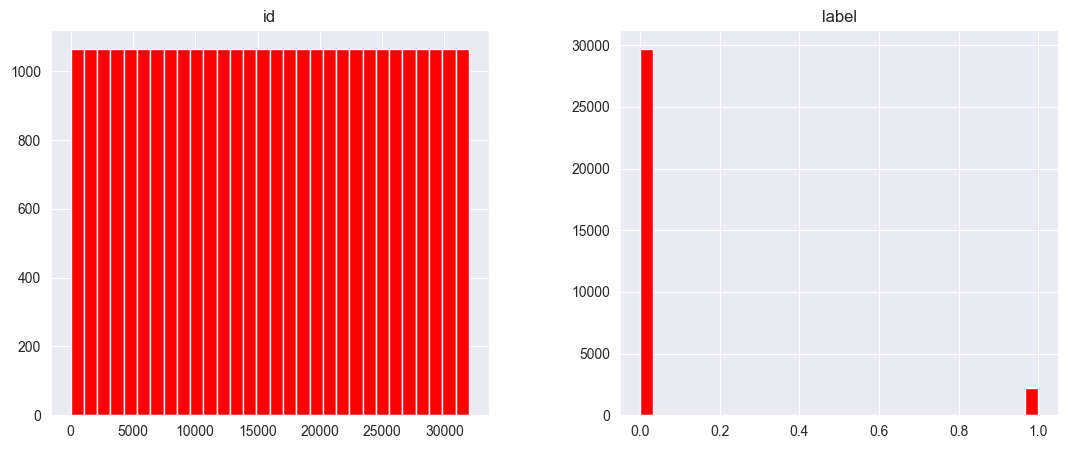

In [5]:
df.hist(bins=30, figsize=(13, 5), color='r')
plt.show()

## Очистка данных

In [6]:
features = df.drop(columns='label', axis=1)
targets = df['label']

In [7]:
nlp = spacy.load('en_core_web_sm')


def data_clean(data):
    # Переведем текст в нижний регистр
    data = data.lower()
    # Удалим лишние символы и пунктуацию
    data = re.sub(r'[^a-zA-Z\s]', '', data)
    # Произведем лемматизацию текста
    doc = nlp(data)
    data = ' '.join([token.lemma_ for token in doc])
    return data

In [8]:
features['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [9]:
features['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [10]:
features['tweet'] = features['tweet'].apply(data_clean)

In [11]:
features['tweet'].head(1)

0      user when a father be dysfunctional and be s...
Name: tweet, dtype: object

In [12]:
data = features['tweet'].values

## TF-IDF векторизация

In [13]:
Vector = TfidfVectorizer()
Vector.fit(data)
data = Vector.transform(data)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, stratify=targets, random_state=42)

# Классификатор случайного леса

In [19]:
rf_classifier = RandomForestClassifier(verbose=10, n_jobs=20)
# Обучим модель на тренировочных данных
rf_classifier.fit(X_train, y_train)
# Сделаем прогноз по тренировочному набору данных
predTrain_rf = rf_classifier.predict(X_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    2.5s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    3.6s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    5.3s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100


[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    8.3s


building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100


[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    9.3s


building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100


[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:   12.6s


building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100


[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:   15.2s remaining:    5.9s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:   17.4s remaining:    3.5s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:   18.5s remaining:    1.1s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:   19.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.1s finished

In [20]:
# Посмотрим точность на тренировочных данных
accuracyTrain_rf = accuracy_score(predTrain_rf, y_train)
print('Accuracy (train): ', accuracyTrain_rf)

Accuracy (train):  0.9998826704212131


In [21]:
# Выполним прогноз на тестовых данных
predTest_rf = rf_classifier.predict(X_test)

# Посмотрим точность на тестовых данных
accuracyTest_rf = accuracy_score(predTest_rf, y_test)
print('Accuracy (test): ', accuracyTest_rf)

Accuracy (test):  0.9597997810104802


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


# Undersampling и Oversampling

## Undersampling

In [22]:
# Выберем стратегию борьбы с андерсемплингом
undersample = RandomUnderSampler(sampling_strategy='majority')
newdata, newtargets = undersample.fit_resample(data, targets)

In [23]:
from collections import Counter

print(Counter(newtargets))

Counter({0: 2242, 1: 2242})


In [24]:
print(len(newtargets))

4484


In [25]:
X_train, X_test, y_train, y_test = train_test_split(newdata, newtargets, test_size=0.2, stratify=newtargets,
                                                    random_state=42)

In [26]:
rf_classifier = RandomForestClassifier(verbose=10, n_jobs=20)
rf_classifier.fit(X_train, y_train)
predTrain_rf = rf_classifier.predict(X_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100building tree 22 of 100

building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.2s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 47 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.5s


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.7s


building tree 70 of 100building tree 71 of 100

building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100


[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.9s


building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.0s remainin

In [27]:
# Посмотрим точность на тренировочных данных
accuracyTrain_rf = accuracy_score(predTrain_rf, y_train)
print('Accuracy (train): ', accuracyTrain_rf)

Accuracy (train):  1.0


In [28]:
# Посмотрим точность на тестовых данных
predTest_rf = rf_classifier.predict(X_test)
accuracyTest_rf = accuracy_score(predTest_rf, y_test)
print('Accuracy (test): ', accuracyTest_rf)

Accuracy (test):  0.835005574136009


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


## Oversampling

In [29]:
# Выберем стратегию борьбы с оверсемплингом
oversample = RandomOverSampler(sampling_strategy='minority')
newdata, newtargets = oversample.fit_resample(data, targets)

In [30]:
print(Counter(newtargets))

Counter({0: 29720, 1: 29720})


In [31]:
X_train, X_test, y_train, y_test = train_test_split(newdata, newtargets, test_size=0.2, stratify=newtargets,
                                                    random_state=42)

In [32]:
rf_classifier = RandomForestClassifier(verbose=10, n_jobs=20)
rf_classifier.fit(X_train, y_train)
predTrain_rf = rf_classifier.predict(X_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    2.9s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    3.9s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100building tree 41 of 100


[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    5.7s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100


[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    8.4s


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100


[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:   10.1s


building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100


[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:   12.7s


building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100


[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:   15.4s remaining:    5.9s


building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:   17.5s remaining:    3.5s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:   18.6s remaining:    1.1s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:   19.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.2s finished

In [33]:
accuracyTrain_rf = accuracy_score(predTrain_rf, y_train)
print('Accuracy (train): ', accuracyTrain_rf)

Accuracy (train):  0.9999579407806191


In [34]:
predTest_rf = rf_classifier.predict(X_test)
accuracyTest_rf = accuracy_score(predTest_rf, y_test)
print('Accuracy (test): ', accuracyTest_rf)

Accuracy (test):  0.9978129205921938


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  72 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  83 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  94 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


## Сравнение

In [35]:
results = {
    'Варианты': ['Изначальный набор данных', 'Случаный Undersampling', 'Случайный Oversampling'],
    'Accuracy (train)': [0.9998, 1.0, 0.9999],
    'Accuracy (test)': [0.9618, 0.827, 0.9979]
}
results_df = pd.DataFrame(results)
print(results_df)

                   Варианты  Accuracy (train)  Accuracy (test)
0  Изначальный набор данных            0.9998           0.9618
1    Случаный Undersampling            1.0000           0.8270
2    Случайный Oversampling            0.9999           0.9979
